In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
import pandas as pd
import numpy as np
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
car_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",names = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price'])

In [3]:
car_df.head(2).transpose()

,0,1
symboling,3,3
normalized_losses,?,?
make,alfa-romero,alfa-romero
fuel_type,gas,gas
aspiration,std,std
num_of_doors,two,two
body_style,convertible,convertible
drive_wheels,rwd,rwd
engine_location,front,front
wheel_base,88.6,88.6


In [4]:
car_df.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [5]:
car_df = car_df.drop('make', axis=1)  # dropping make here but in real project, may separate data based on make. 
#The different makes in same data set may not be a good idea

# dropping following columns due to low variance filter. i.e an attribute which is mostly one type of data is not a good dimension
car_df = car_df.drop('fuel_type', axis=1)
car_df = car_df.drop('engine_location', axis=1)
car_df = car_df.drop('num_of_doors', axis=1) 
car_df = car_df.drop('body_style' , axis=1)
car_df = car_df.drop('drive_wheels', axis=1)
car_df = car_df.drop('engine_type', axis=1) # need more info on this column
car_df = car_df.drop('fuel_system', axis=1)
car_df = car_df.drop('aspiration', axis=1)
car_df = car_df.drop('normalized_losses', axis=1)


In [6]:
# Check the structure of the dataframe after dropping the unwanted columns
car_df.dtypes

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [7]:
# Replace the string numbers into numerical values for number of cylinders
car_df['cylinder'] = car_df['num_of_cylinders'].replace({'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five':5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10, 'eleven': 11, 'twelve': 12})

In [8]:
car_df = car_df.replace('?', np.nan)  #replace ? with NA which is equivalent of NULL
#car_df[car_df.isnull().any(axis=1)]  # display records with 'NA' 

# Change the attribute types from object to float type (generic numeric types) 
car_df['bore'] = car_df['bore'].astype('float64')
car_df['stroke']= car_df['stroke'].astype('float64')
car_df['horsepower']= car_df['horsepower'].astype('float64')
car_df['peak_rpm']= car_df['peak_rpm'].astype('float64')
car_df['price'] = car_df['price'].astype('float64')
#car_df['cylinder']= car_df['cylinder'].astype('int64')  # not required 
#car_df['normalized_losses']= car_df['normalized_losses'].astype('float64')

# fill up NaN in numeric columns with median values of those columns respectively
car_df['price'] = car_df['price'].fillna(car_df['price'].median())
car_df['bore']= car_df['bore'].fillna(car_df['bore'].median())
car_df['horsepower'] = car_df['horsepower'].fillna(car_df['horsepower'].median())
car_df['peak_rpm'] = car_df['peak_rpm'].fillna(car_df['peak_rpm'].median())
car_df['stroke'] = car_df['stroke'].fillna(car_df['stroke'].median())
car_df['cylinder'] = car_df['cylinder'].fillna(car_df['cylinder'].median())


In [9]:
# Look at the distribution of data on the various attributes. Look for outliers.... 

car_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329366,0.270858,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.256098,0.313634,2.07,3.11,3.29,3.41,4.17
compression_ratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


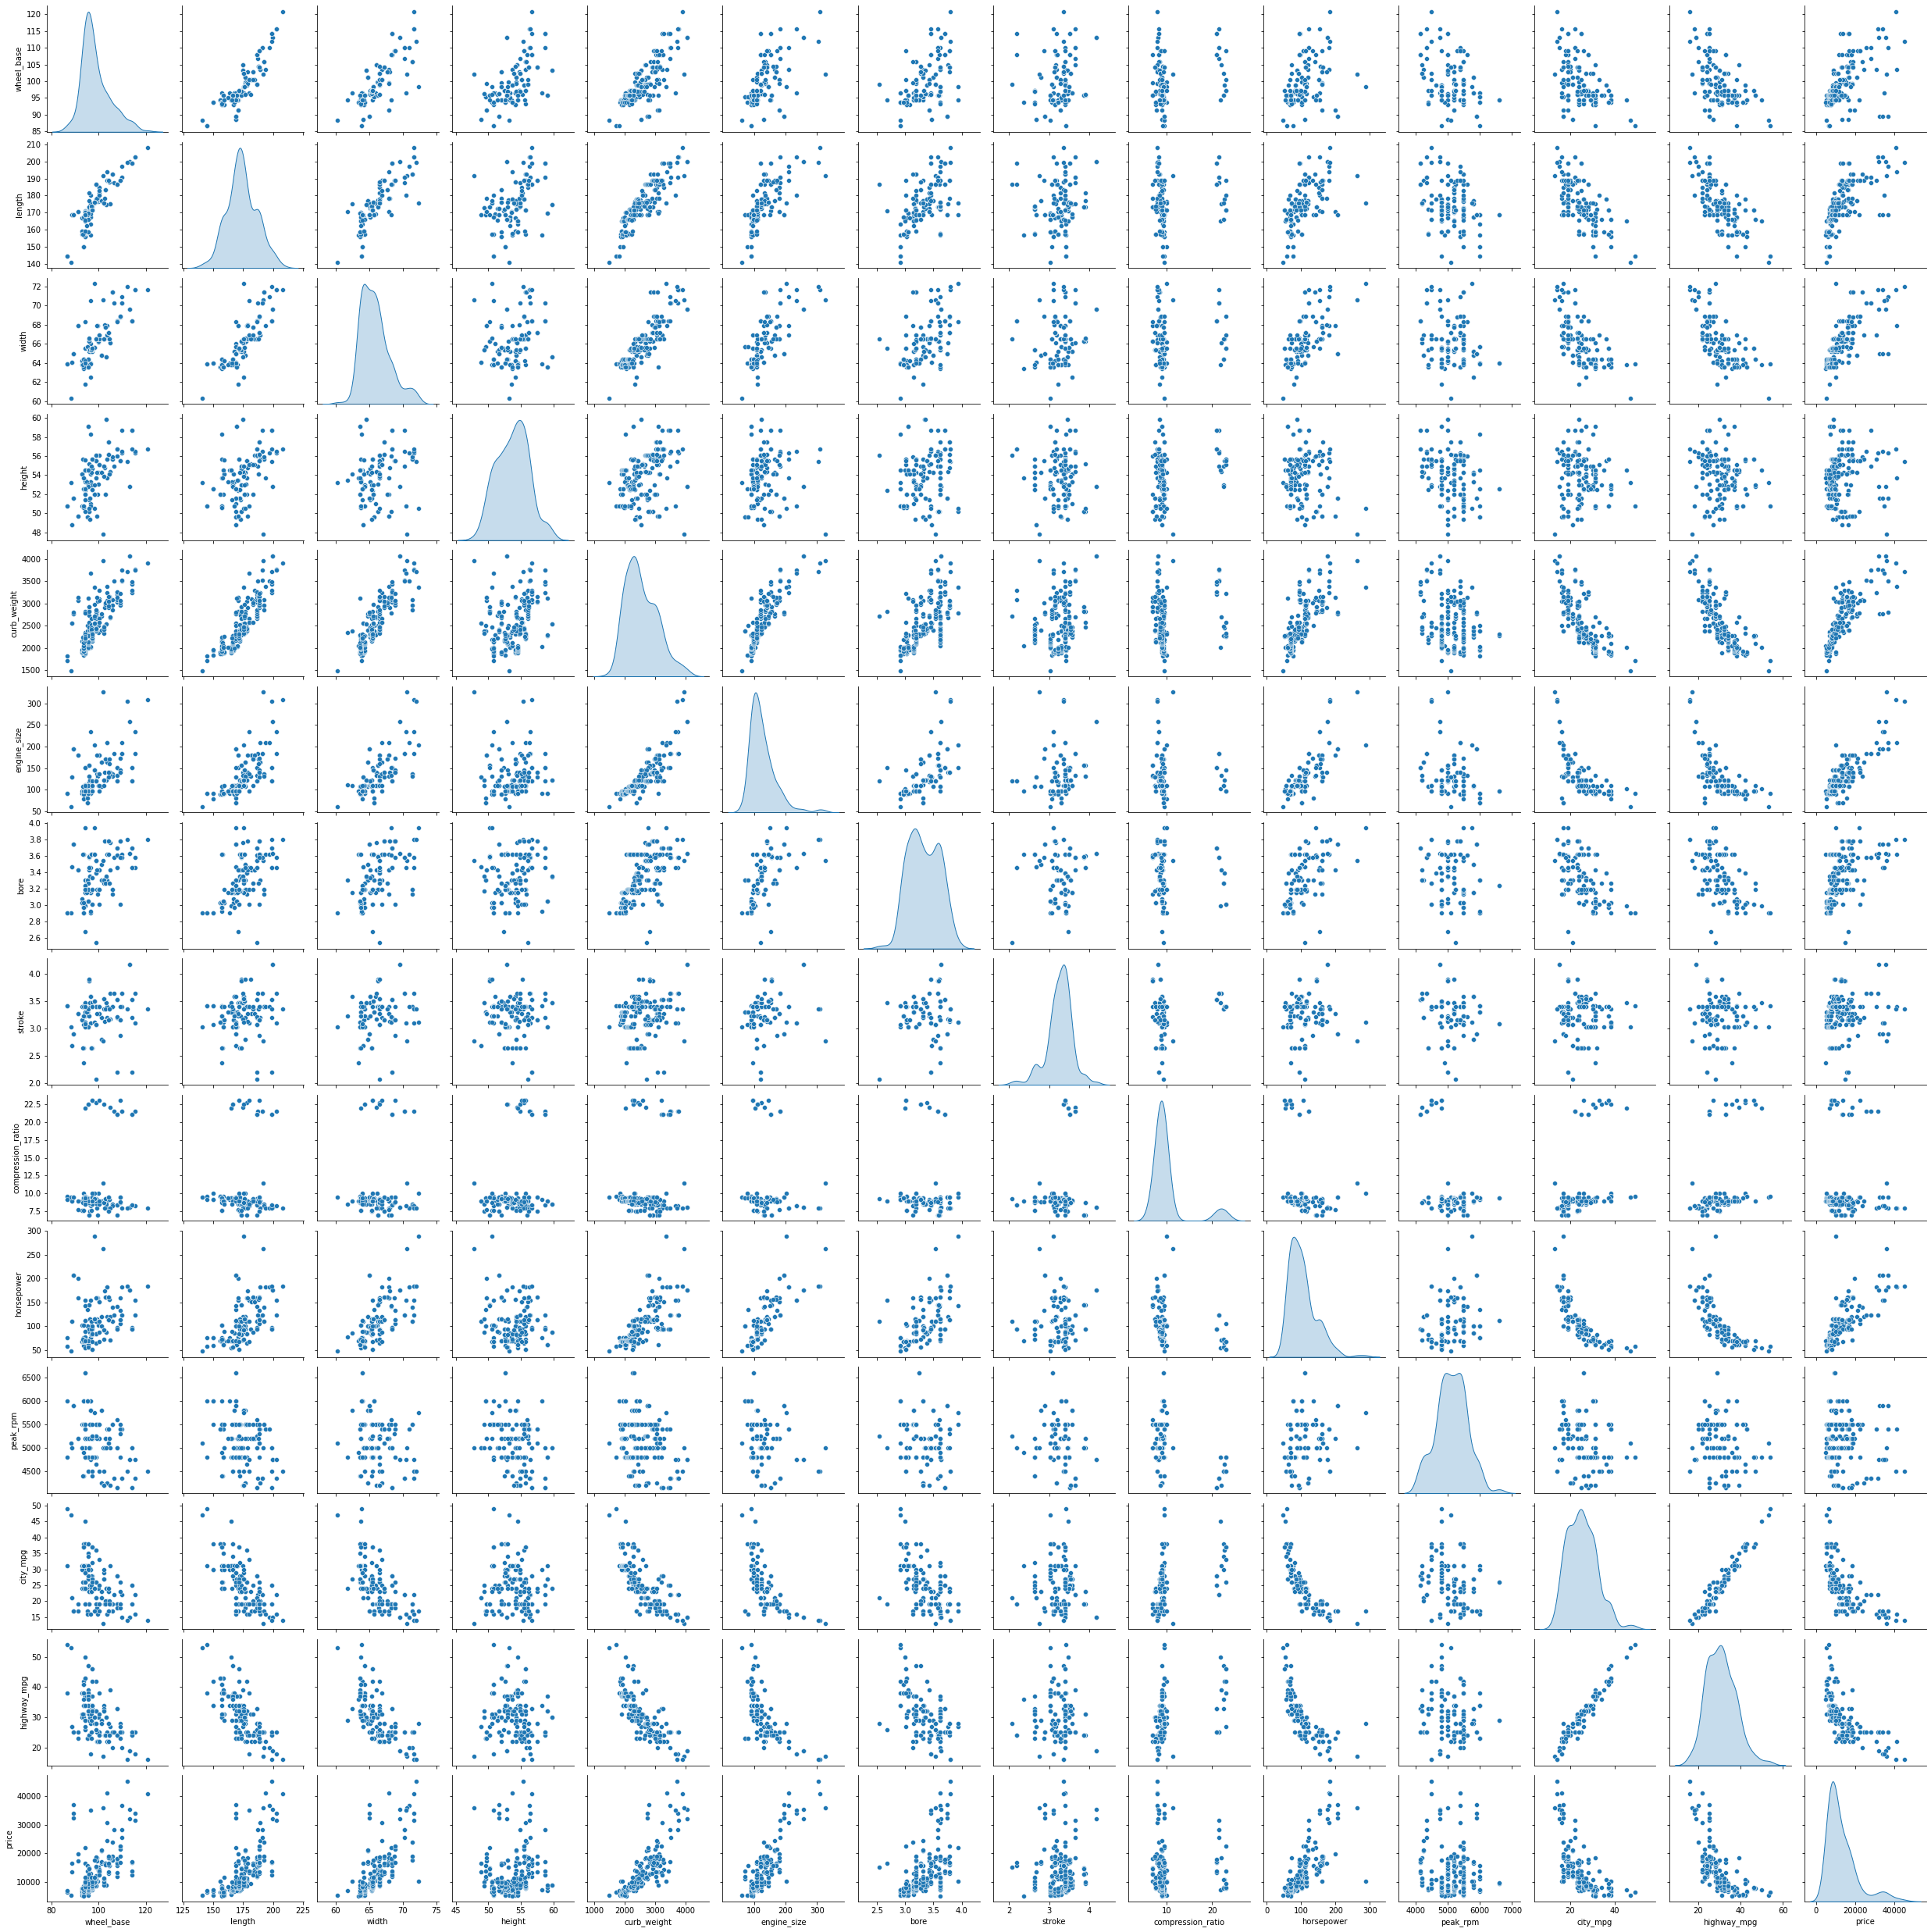

In [10]:
#importing seaborn for statistical plots
import seaborn as sns
car_df_attr = car_df.iloc[:,1:16]

sns.pairplot(car_df_attr , diag_kind = 'kde')

#did not consider other attributes such as number of doors, engine location etc due to low variance filter concept
#pair plot shows clearly some relation between price and height, curb weight, engine size, number of cylinders, horsepower and inversely related to mpg

The data seems to be a mix of cars of high end and economy leading to a cluster of points at lower end in many of the attributes, leading to a long tail in multiple attributes

In this context a decision tree and linear regression could be a good start.

In [11]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = car_df.drop('price', axis=1)
X = X.drop('num_of_cylinders', axis=1)# Removing this column as we have created another column "cylinder" out of this

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = car_df[['price']]


In [12]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [13]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [14]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for symboling is 88.5779490097282
The coefficient for wheel_base is 71.82402760934514
The coefficient for length is -93.38447872011737
The coefficient for width is 479.8164355926823
The coefficient for height is 315.2038400121189
The coefficient for curb_weight is -0.8657326891350792
The coefficient for engine_size is 251.74362582792077
The coefficient for bore is -6832.5509876354345
The coefficient for stroke is -5085.818859790609
The coefficient for compression_ratio is 335.7682519296421
The coefficient for horsepower is -0.03898796131272775
The coefficient for peak_rpm is 2.430049493582395
The coefficient for city_mpg is -201.8171320034724
The coefficient for highway_mpg is -41.93431935731743
The coefficient for cylinder is -3176.1760903729664


In [16]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -12323.06017456992


In [17]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.836217648329037

How can the model peformance be improved? 
1. Always address outliers first. Linear models get easily impacted by outliers
2. We noticed that on many attributes, there was a clump of data points on lower values and scattered on high values
3. That is an indication of mixing data from two or more different segments. Maybe if we segregate the data we will get better results
4. Not all attributes show a linear relation to price. Convert these attributes to quadratic form which may give a better fit on linear model

In [18]:
import statsmodels.formula.api as smf

# put the price column and the predictors together in on single array for OLS to work

#cars = pd.concat([y_train, X_train], axis=1, join='inner')
cars = pd.concat([y_train, X_train], axis=1)
cars.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,price,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,cylinder
14,24565.0,1,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,121.0,4250.0,20,25,6
162,9258.0,0,95.7,166.3,64.4,52.8,2140,98,3.19,3.03,9.0,70.0,4800.0,28,34,4
59,8845.0,1,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84.0,4800.0,26,32,4
19,6295.0,1,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70.0,5400.0,38,43,4
177,11248.0,-1,102.4,175.6,66.5,53.9,2458,122,3.31,3.54,8.7,92.0,4200.0,27,32,4


In [19]:
lmcars = smf.ols(formula= 'price ~ symboling + wheel_base + length + width + height + curb_weight +  engine_size + bore + stroke + compression_ratio + horsepower + peak_rpm + city_mpg + highway_mpg  + cylinder', data=cars).fit()
#lmcars = smf.ols(formula= 'price ~ length+ engine_size + bore+ stroke + compression_ratio + curb_weight+ peak_rpm + horsepower + cylinder', data=cars).fit()

In [20]:
lmcars.params

Intercept           -12323.060175
symboling               88.577949
wheel_base              71.824028
length                 -93.384479
width                  479.816436
height                 315.203840
curb_weight             -0.865733
engine_size            251.743626
bore                 -6832.550988
stroke               -5085.818860
compression_ratio      335.768252
horsepower              -0.038988
peak_rpm                 2.430049
city_mpg              -201.817132
highway_mpg            -41.934319
cylinder             -3176.176090
dtype: float64

In [21]:
print(lmcars.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     41.83
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           1.31e-43
Time:                        11:09:54   Log-Likelihood:                -1455.7
No. Observations:                 153   AIC:                             2943.
Df Residuals:                     137   BIC:                             2992.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.232e+04   1.92e+0